# Implementing Neural Networks in PyTorch

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<a href="https://colab.research.google.com/github/DeepTrackAI/DeepLearningCrashCourse/blob/main/Ch03_CNN/ec03_1_cnn/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></div>

This notebook provides you with a set of code examples to implement neural networks with PyTorch.

<div style="background-color: #f0f8ff; border: 2px solid #4682b4; padding: 10px;">
<strong>Note:</strong> This notebook contains the Code Example 3-1 from the book  

**Deep Learning Crash Course**  
Benjamin Midtvedt, Jesús Pineda, Henrik Klein Moberg, Harshith Bachimanchi, Joana B. Pereira, Carlo Manzo, Giovanni Volpe  
No Starch Press, San Francisco (CA), 2025  
ISBN-13: 9781718503922  

[https://nostarch.com/deep-learning-crash-course](https://nostarch.com/deep-learning-crash-course)

You can find the other notebooks on the [Deep Learning Crash Course GitHub page](https://github.com/DeepTrackAI/DeepLearningCrashCourse).
</div>

## Understanding Convolutions

Implement a moving average with a 1D convolution ...

In [1]:
import numpy as np

signal = np.array([0, 2, 0, 2, 0, 2, 0, 2, 0])

filter1d = np.ones(2) / 2

conv1d_length = signal.shape[0] - filter1d.shape[0] + 1
conv1d = np.zeros((conv1d_length,))
for i in range(conv1d_length):
    conv1d[i] = np.sum(signal[i:i + filter1d.shape[0]] * filter1d)

print(conv1d)

[1. 1. 1. 1. 1. 1. 1. 1.]


... and implement a 2D convolution.

In [2]:
image = np.array([
    [1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
])

filter2d = np.ones((2, 2)) / 4

conv2d_height = image.shape[0] - filter2d.shape[0] + 1
conv2d_width = image.shape[1] - filter2d.shape[1] + 1
conv2d = np.zeros((conv2d_height, conv2d_width))
for i in range(conv2d_height):
    for j in range(conv2d_width):
        conv2d[i, j] = np.sum(
            image[i:i + filter2d.shape[0], j:j + filter2d.shape[1]] * filter2d
        )

print(conv2d)

[[1.  0.5 0.  0.5 1.  0.5 0.  0.5 1. ]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.  0.5 1.  0.5 0.  0.5 1.  0.5 0. ]]


## Creating a Sample Image

Create a sample image in PyTorch (note the position of the color channel) ...

In [3]:
import torch

H, W, S = 12, 16, 4  # Height, width, square size
image = torch.zeros(1, H, W)
for idx in range(0, H, S):
    for idy in range(0, W, S):
        image[0, idx:idx + S, idy:idy + S] = (-1) ** (idx // S + idy // S)

... implement a function to render the image ...

In [4]:
import matplotlib.pyplot as plt

def plot_image(image):
    """Render an image."""
    plt.imshow(image, cmap="gray", aspect="equal", vmin=-2, vmax=2,
               extent=[0, image.shape[1], 0, image.shape[0]])
    plt.colorbar()
    plt.xticks(range(0, image.shape[1] + 1))
    plt.yticks(range(0, image.shape[0] + 1))
    plt.grid(color="red", linewidth=1)
    plt.show()

... and plot the image.

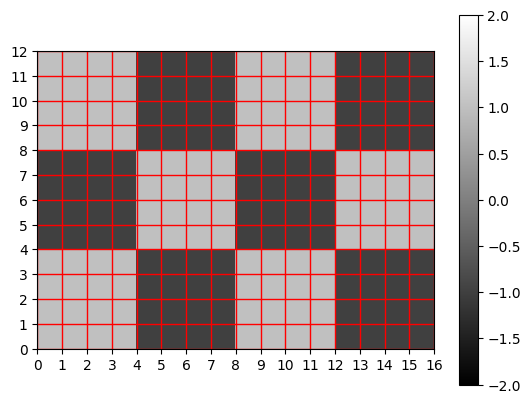

In [5]:
plot_image(image.squeeze())

## Implementing Convolutional Layers

Implement a convolutional layer in PyTorch ...

In [6]:
import torch.nn as nn

conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=(1, 3), bias=False)
filters = torch.zeros(conv.out_channels, conv.in_channels, *conv.kernel_size)
filters[0, 0, :, :] = torch.tensor([[1, 1, 1],]) / 3
filters[1, 0, :, :] = torch.tensor([[-1, 0, 1],])
conv.weight = nn.Parameter(filters)

features_conv = conv(image.unsqueeze(0))

... implement a function to render the multiple channels of an image ...

In [7]:
def plot_channels(channels, figsize=(15, 5)):
    """Render multiple channels."""
    fig, axs = plt.subplots(1, channels.shape[0], figsize=figsize)
    for channel, ax, i in zip(channels, axs, range(channels.shape[0])):
        im = ax.imshow(channel, cmap="gray", aspect="equal", vmin=-2, vmax=2,
                       extent=[0, channel.shape[1], 0, channel.shape[0]])
        plt.colorbar(im)
        ax.set_title(f"Channel {i}", fontsize=24)
        ax.set_xticks(range(0, channel.shape[1] + 1))
        ax.set_yticks(range(0, channel.shape[0] + 1))
        ax.grid(color="red", linewidth=1)
    plt.show()

... and plot the feature maps.

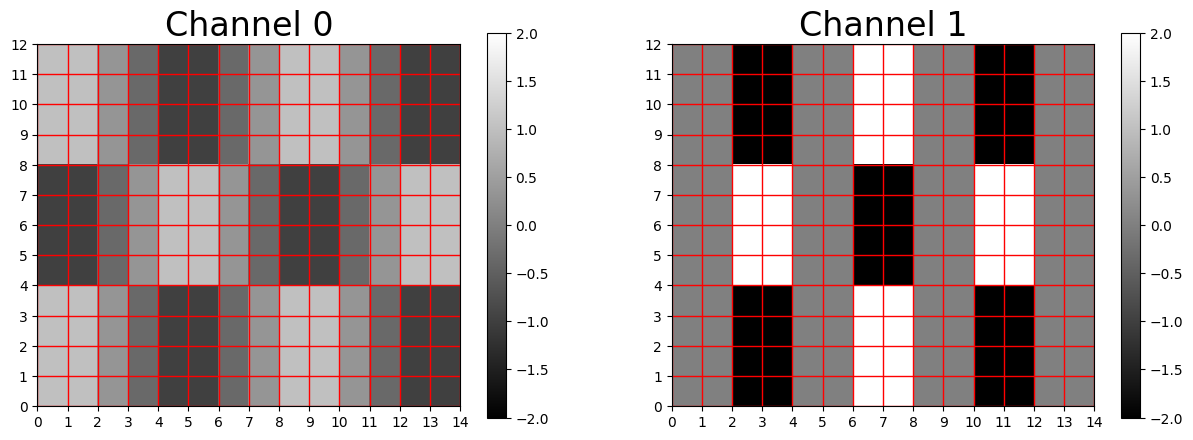

In [8]:
plot_channels(features_conv[0].detach())

## Implementing ReLU Activation

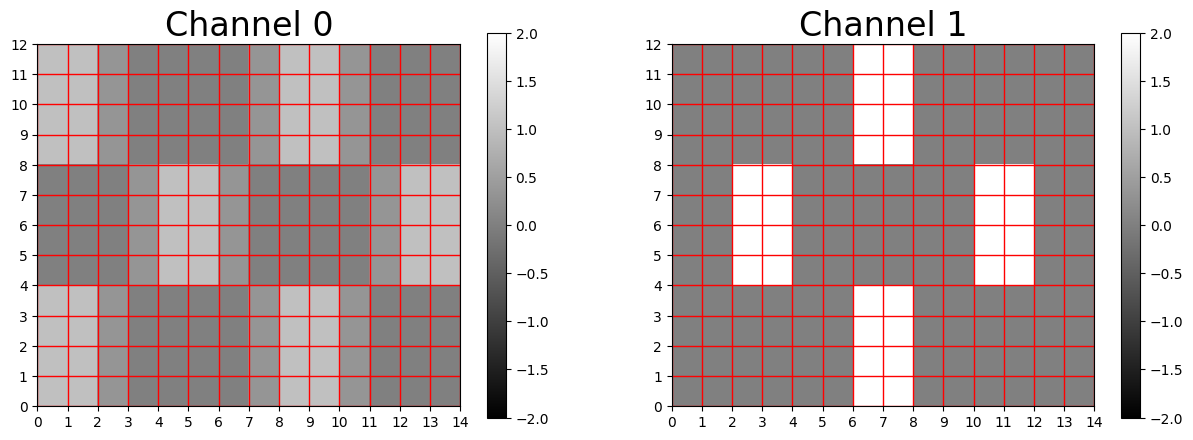

In [9]:
relu = nn.ReLU()
model_relu = nn.Sequential(conv, relu)

features_relu = model_relu(image.unsqueeze(0))

plot_channels(features_relu[0].detach())

## Implementing Pooling Layers

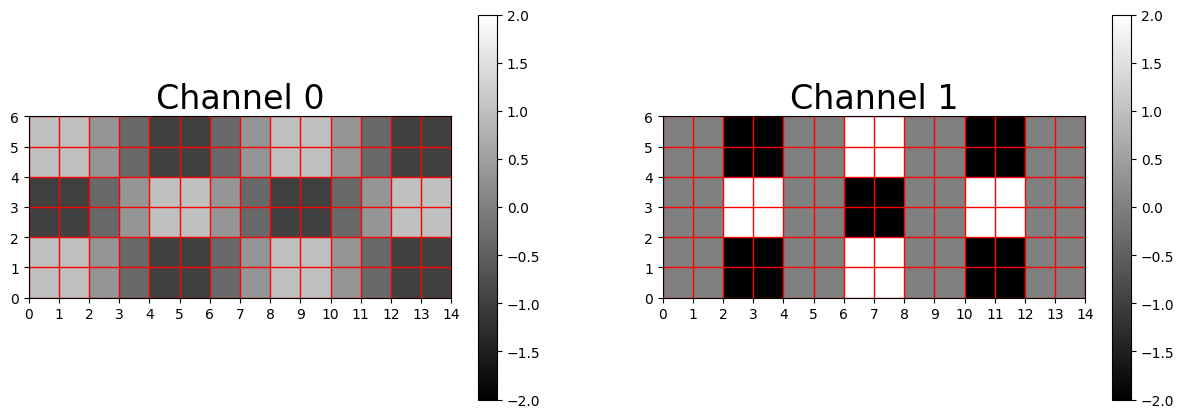

In [10]:
pool = nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1))
model_pool = nn.Sequential(conv, pool)

features_pool = model_pool(image.unsqueeze(0))

plot_channels(features_pool[0].detach())

## Implementing Upsampling Layers


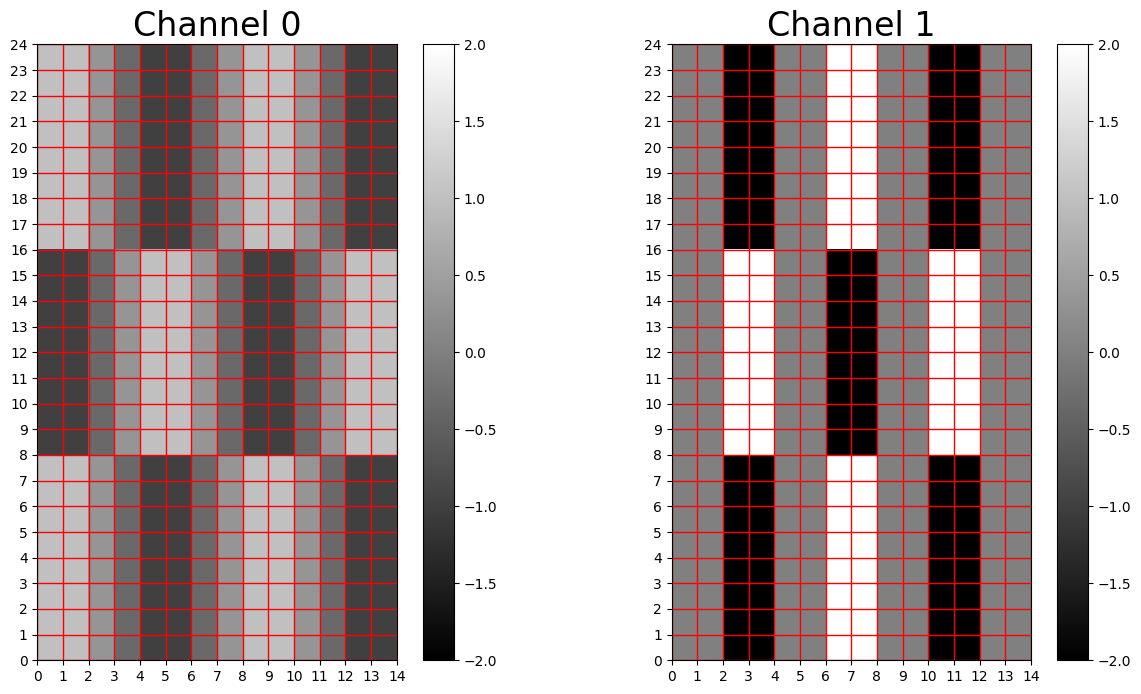

In [11]:
upsample = nn.Upsample(scale_factor=(2, 1))
model_upsample = nn.Sequential(conv, upsample)

features_upsample = model_upsample(image.unsqueeze(0))

plot_channels(features_upsample[0].detach(), figsize=(15, 8))

## Transforming Images

Implement a convolutional neural network to transform an image ...

In [12]:
model_trans = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
)
image_trans = model_trans(image.unsqueeze(0))[0]

... and check the dimensions of the input image ...

In [13]:
print(f"Input image with {image.shape}")

Input image with torch.Size([1, 12, 16])


... and of the output image.

In [14]:
print(f"Output image with {image_trans.shape}")

Output image with torch.Size([32, 1, 2])


## 

## Using Dense Layers to Classify Images

Implement a convolutional neural network with a dense top to classify images ...

In [15]:
model_clas = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(in_features=32 * 1 * 2, out_features=2),
    nn.Softmax(dim=1),
)
classification = model_clas(image.unsqueeze(0))[0]

... and check the dimensions of the input image ...

In [16]:
print(f"Input image with {image.shape}")

Input image with torch.Size([1, 12, 16])


... and of the neural network output.

In [17]:
print(f"Output classification with {classification.shape}")

Output classification with torch.Size([2])
